# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [45]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [46]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | morinville
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | zouerate
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | kargasok
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | vorkuta
Processing Record 10 of Set 1 | muzayri'
City not found. Skipping...
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | howard springs
Processing Record 13 of Set 1 | harstad
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | deori khas
Processing Record 18 of Set 1 | cadale
Processing Record 19 of Set 1 | quellon
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | avarua
Processing

In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [50]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,morinville,53.8001,-113.6520,279.82,55,20,2.06,CA,1699563657
1,grytviken,-54.2811,-36.5092,276.47,99,100,3.17,GS,1699563657
2,zouerate,22.7187,-12.4521,296.80,24,0,2.82,MR,1699563657
3,port elizabeth,-33.9180,25.5701,287.21,86,0,0.00,ZA,1699563658
4,blackmans bay,-43.0167,147.3167,288.22,95,31,0.45,AU,1699563658


In [51]:
city_data_new = [(x - 273.15) for x in city_data_df["Max Temp"]]
city_data_df["Max Temp"] = city_data_new
city_data_new=[]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,morinville,53.8001,-113.6520,6.67,55,20,2.06,CA,1699563657
1,grytviken,-54.2811,-36.5092,3.32,99,100,3.17,GS,1699563657
2,zouerate,22.7187,-12.4521,23.65,24,0,2.82,MR,1699563657
3,port elizabeth,-33.9180,25.5701,14.06,86,0,0.00,ZA,1699563658
4,blackmans bay,-43.0167,147.3167,15.07,95,31,0.45,AU,1699563658


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,morinville,53.8001,-113.6520,6.67,55,20,2.06,CA,1699563657
1,grytviken,-54.2811,-36.5092,3.32,99,100,3.17,GS,1699563657
2,zouerate,22.7187,-12.4521,23.65,24,0,2.82,MR,1699563657
3,port elizabeth,-33.9180,25.5701,14.06,86,0,0.00,ZA,1699563658
4,blackmans bay,-43.0167,147.3167,15.07,95,31,0.45,AU,1699563658


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

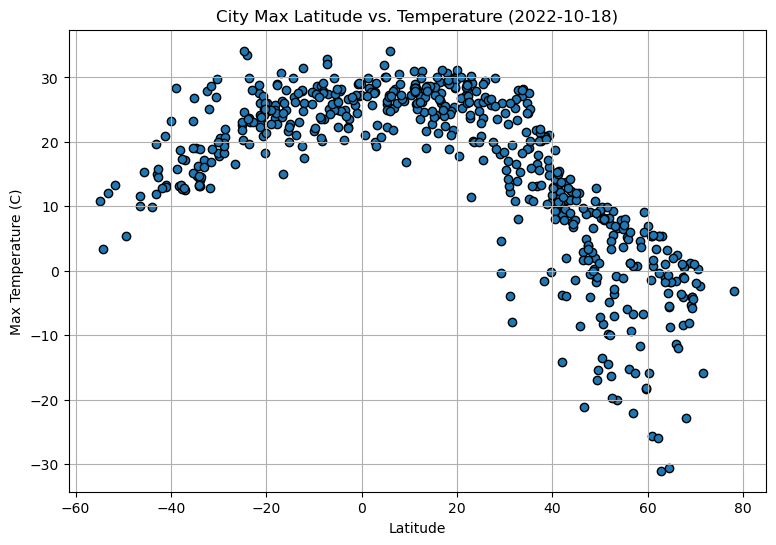

In [54]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
mt = city_data_df["Max Temp"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.scatter(lat, mt, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

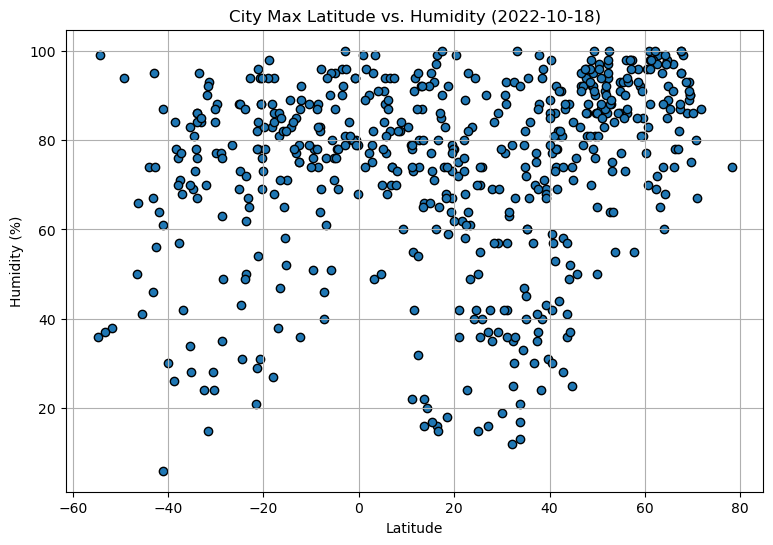

In [55]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']
hd = city_data_df["Humidity"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(lat, hd, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

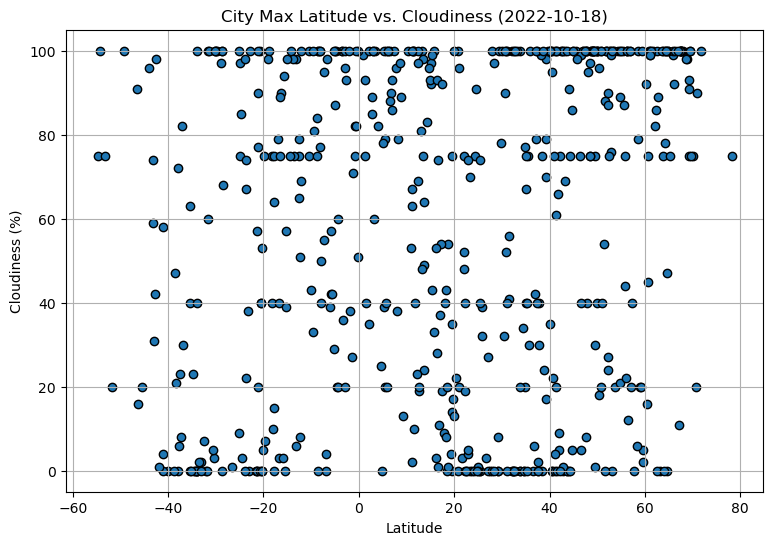

In [56]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
cld = city_data_df["Cloudiness"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(lat, cld, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

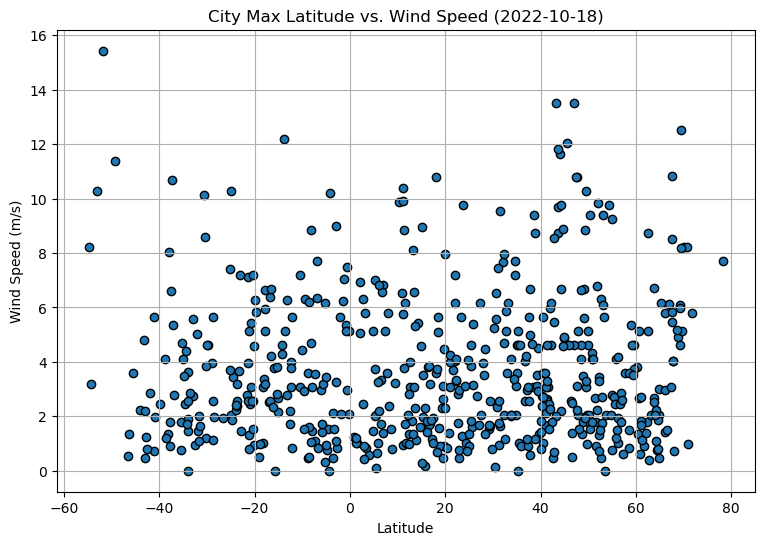

In [57]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
ws = city_data_df["Wind Speed"]
plt.figure(figsize=(9,6))
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.scatter(lat, ws, edgecolor='black')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
import numpy as np

def linearReg(x_values, y_values, xlabel, ylabel, label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    correlation = st.pearsonr(x_values, y_values)
    print(f"The r-value is: {round(correlation[0], 4)}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.annotate(line_eq, ( (np.mean(x_values) * 0.8) , (np.mean(y_values) * 0.8) ), color='r')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f"../output_data/LinReg{label}.png")
    plt.show()

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[ city_data_df["Lat"] >= 0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,morinville,53.8001,-113.6520,6.67,55,20,2.06,CA,1699563657
2,zouerate,22.7187,-12.4521,23.65,24,0,2.82,MR,1699563657
5,kargasok,59.0556,80.8572,-6.69,92,20,5.36,RU,1699563659
7,vorkuta,67.5000,64.0000,-0.97,95,100,5.47,RU,1699563659
10,harstad,68.7990,16.5293,1.20,86,98,4.92,NO,1699563662


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[ city_data_df["Lat"] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,3.32,99,100,3.17,GS,1699563657
3,port elizabeth,-33.9180,25.5701,14.06,86,0,0.00,ZA,1699563658
4,blackmans bay,-43.0167,147.3167,15.07,95,31,0.45,AU,1699563658
6,waitangi,-43.9535,-176.5597,9.90,74,96,2.24,NZ,1699563659
8,codrington,-38.2667,141.9667,13.12,78,21,1.34,AU,1699563660


###  Temperature vs. Latitude Linear Regression Plot

In [1]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
y_lab = ("Max Temperature (C)")
coord = (40, 20)
plot_linreg(x, y, y_lab, coord)

NameError: name 'northern_hemi_df' is not defined

In [2]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
y_lab = ("Max Temperature (C)")
coord = (-30,10)
plot_linreg(x, y, y_lab, coord)

NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


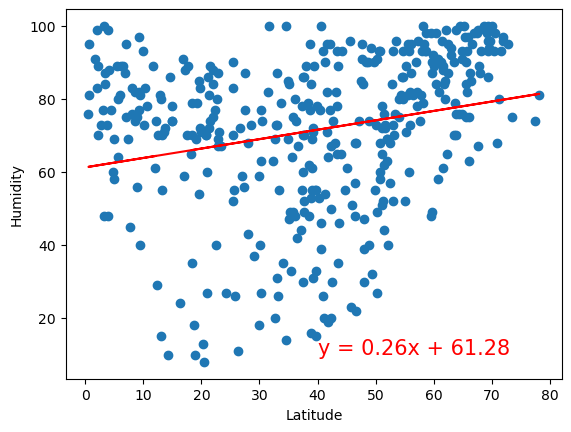

In [17]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
y_lab = ("Humidity (%)")
coord = (40, 60)
plot_linreg(x, y, y_lab, coord)

The r-value is: 0.0002808747046324607


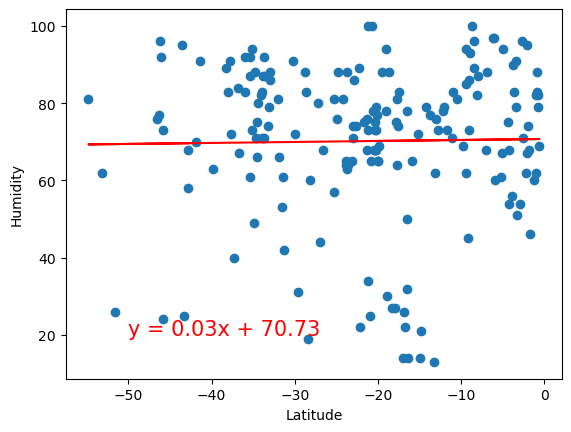

In [18]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
y_lab = ("Humidity (%)")
coord = (-30,50)
plot_linreg(x, y, y_lab, coord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


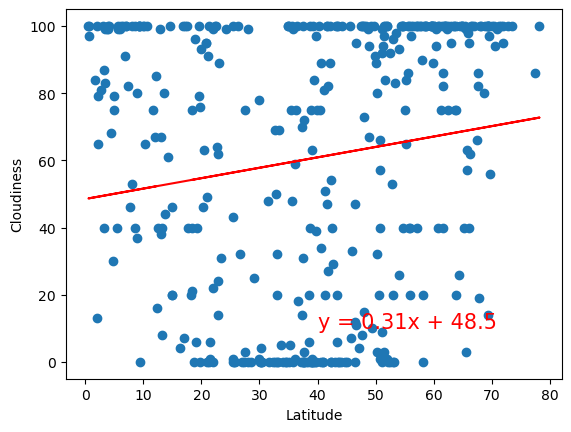

In [19]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
y_lab = ("Cloudiness (%)")
coord = (40, 40)
plot_linreg(x, y, y_lab, coord)

The r-value is: 0.02056735429994368


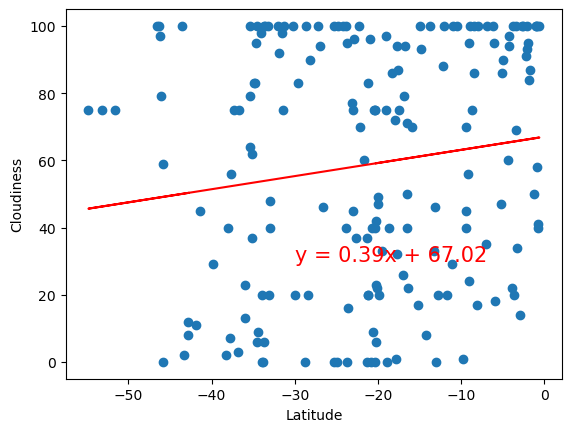

In [20]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
y_lab = ("Cloudiness (%)")
coord = (-30,30)
plot_linreg(x, y, y_lab, coord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


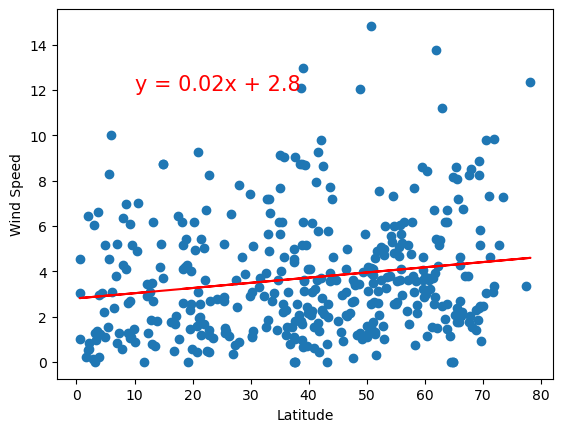

In [21]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
y_lab = ("Wind Speed (m/s)")
coord = (40, 5)
plot_linreg(x, y, y_lab, coord)

The r-value is: 0.062239040700515696


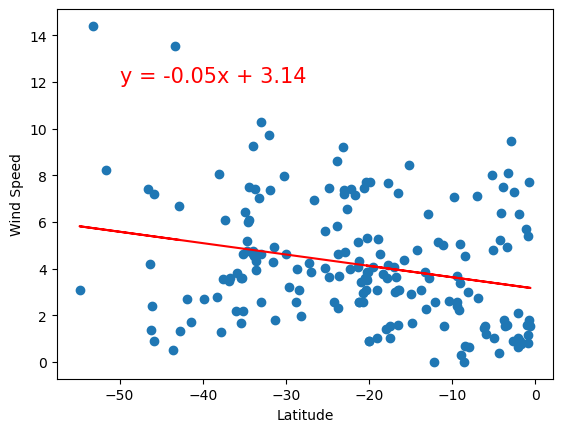

In [22]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
y_lab = ("Wind Speed (m/s)")
coord = (-40,8)
plot_linreg(x, y, y_lab, coord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE